In [1]:
import gymnasium as gym
import numpy as np
from itertools import count
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.multiprocessing as mp
from tqdm import tqdm
import os
os.chdir('..')

In [73]:
import pickle
from scripts.iql import FCDuelingQ
res = {}
with open('testfiles/iql_speakerlistener2.results', 'rb') as file:
    res = pickle.load(file)

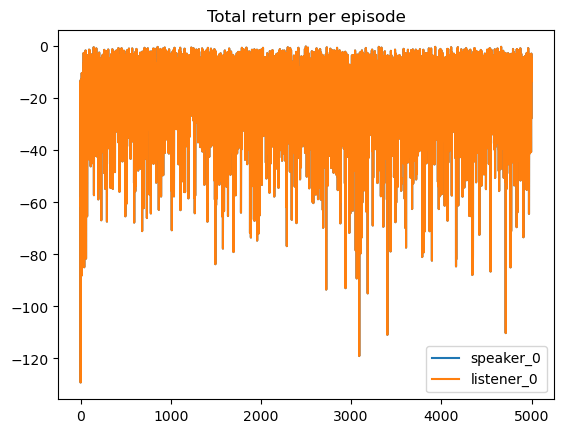

In [74]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), returns, label=f'{agent}')
plt.title('Total return per episode')
#plt.ylim(bottom=-50, top=0)
plt.legend()

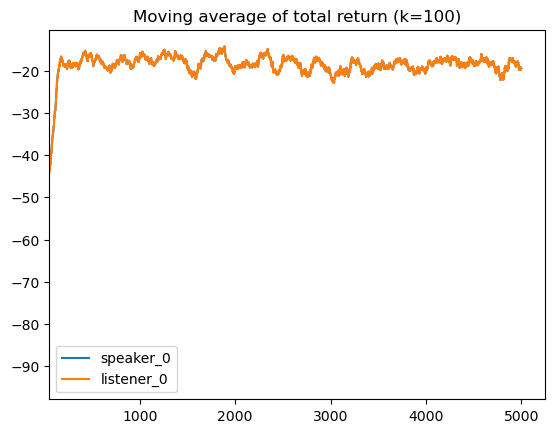

In [75]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), [np.mean(returns[max(0,x-100):x+1]) for x in range(len(returns))], label=f'{agent}')
plt.title('Moving average of total return (k=100)')
#plt.ylim(bottom=-50, top=0)
plt.xlim(left=50)
plt.legend()

In [76]:
from pettingzoo.mpe import simple_speaker_listener_v4
from pettingzoo.mpe import simple_reference_v3
#env = simple_speaker_listener_v4.env(max_cycles=25, render_mode="human")
env = simple_speaker_listener_v4.env(max_cycles=25, render_mode="human")
for _ in range(10):
    env.reset()
    ep_return = {agent : 0 for agent in env.possible_agents}
    for agent in env.agent_iter():
        observation, reward, termination, truncation, info = env.last()
        ep_return[agent] += reward
        if termination or truncation:
            action = None
        else:
            # this is where you would insert your policy
            #action = env.action_space(agent).sample()
            action = res['best_model'][agent](observation).detach().max(1).indices.view(1, 1).item()
        env.step(action)
    print(ep_return)
env.close()

{'speaker_0': -33.4069363269084, 'listener_0': -33.4069363269084}
{'speaker_0': -8.84133635803718, 'listener_0': -8.84133635803718}
{'speaker_0': -22.308687652662538, 'listener_0': -22.308687652662538}
{'speaker_0': -9.107059467996383, 'listener_0': -9.107059467996383}
{'speaker_0': -26.722034917545706, 'listener_0': -26.722034917545706}
{'speaker_0': -8.301899494532528, 'listener_0': -8.301899494532528}
{'speaker_0': -10.922637083731237, 'listener_0': -10.922637083731237}
{'speaker_0': -25.52027833415596, 'listener_0': -25.52027833415596}
{'speaker_0': -65.35334464116005, 'listener_0': -65.35334464116005}
{'speaker_0': -22.409095090223836, 'listener_0': -22.409095090223836}


In [68]:
env.possible_agents

['speaker_0', 'listener_0']

MADDPG notes:
- each agent has centeralized action-value function, input includes observations and actions of ALL agents
- policy function still only take in individual agent's observations as input
- shared replay memory, experience of all agents recorded in single tuple that contains actions and rewards of all agents